In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [10]:
df_cap_k = pd.read_csv('./New_drone_performance.csv')

df_cap_k.head()

,delivary_locations,drone_capacity,obstacles,Without_obstacles,Christofides,Christofides_newton,brut_force_distance,brut_force_Newton
0,15,5,13,48.354502,62.069907,60.669695,52.097913,51.657125
1,15,5,13,58.071913,60.722351,60.632495,59.211927,59.149956
2,15,5,13,47.267460,54.284439,50.949433,48.500273,48.754930
3,15,5,13,43.938570,46.359761,45.913186,45.973371,45.414230
4,15,5,13,48.613052,51.244240,52.560552,50.107529,51.303145


In [11]:
df_filtered = df_cap_k[df_cap_k['drone_capacity'] == 5]
df_filtered.tail()

,delivary_locations,drone_capacity,obstacles,Without_obstacles,Christofides,Christofides_newton,brut_force_distance,brut_force_Newton
18,25,5,13,70.738569,76.776835,75.767670,75.455589,74.826415
19,25,5,13,75.854349,82.586581,82.698638,81.439381,80.086467
20,30,5,13,89.124100,101.864999,94.997399,94.037691,91.202927
21,30,5,13,80.771048,86.613733,88.061674,85.672466,85.344205
22,30,5,13,85.621410,96.752497,97.495846,93.738097,93.736314


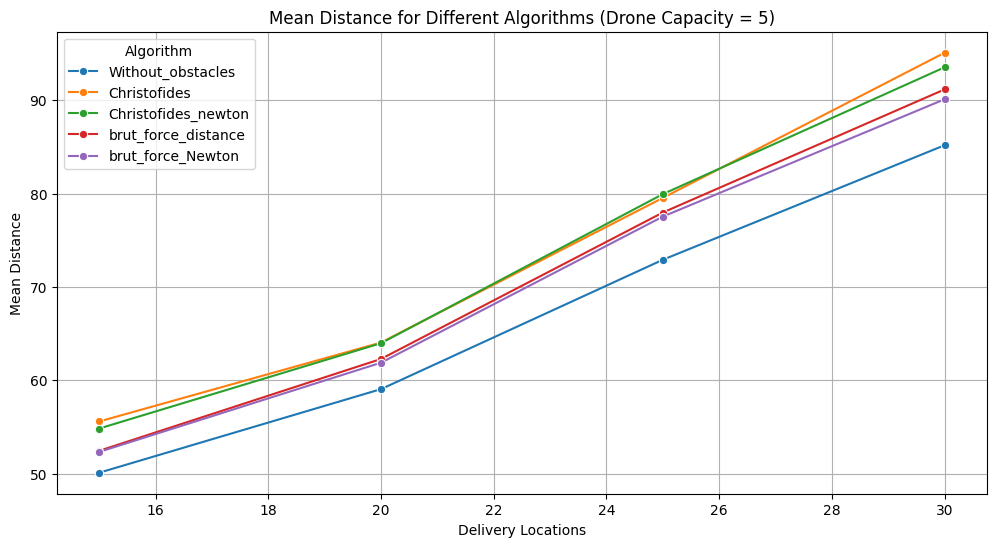

In [12]:
mean_values = df_cap_k.groupby('delivary_locations').mean().reset_index()

# Melt the DataFrame to have 'algorithm' and 'distance' columns for plotting
mean_values_melt = pd.melt(mean_values, id_vars=['delivary_locations'], value_vars=['Without_obstacles', 'Christofides', 'Christofides_newton', 'brut_force_distance', 'brut_force_Newton'], var_name='Algorithm', value_name='Distance')

# Plot the line plot using seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(x='delivary_locations', y='Distance', hue='Algorithm', marker='o', data=mean_values_melt)
plt.title('Mean Distance for Different Algorithms (Drone Capacity = 5)')
plt.xlabel('Delivery Locations')
plt.ylabel('Mean Distance')
plt.grid(True)
plt.show()

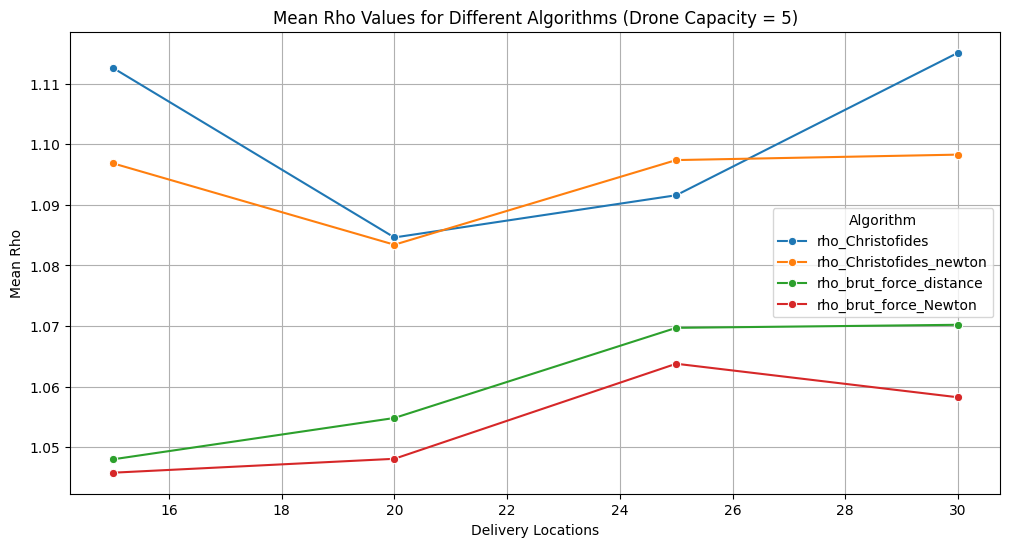

In [14]:
df_cap_k['rho_Christofides'] = df_cap_k['Christofides'] / df_cap_k['Without_obstacles']
df_cap_k['rho_Christofides_newton'] = df_cap_k['Christofides_newton'] / df_cap_k['Without_obstacles']
df_cap_k['rho_brut_force_distance'] = df_cap_k['brut_force_distance'] / df_cap_k['Without_obstacles']
df_cap_k['rho_brut_force_Newton'] = df_cap_k['brut_force_Newton'] / df_cap_k['Without_obstacles']

# Group the data by delivery_locations and calculate the mean
mean_rho = df_cap_k.groupby('delivary_locations')[['rho_Christofides', 'rho_Christofides_newton', 'rho_brut_force_distance', 'rho_brut_force_Newton']].mean().reset_index()

# Melt the DataFrame to have 'algorithm' and 'rho' columns for plotting
mean_rho_melt = pd.melt(mean_rho, id_vars=['delivary_locations'], value_vars=['rho_Christofides', 'rho_Christofides_newton', 'rho_brut_force_distance', 'rho_brut_force_Newton'], var_name='Algorithm', value_name='Mean Rho')

# Plot the line plot using seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(x='delivary_locations', y='Mean Rho', hue='Algorithm', marker='o', data=mean_rho_melt)
plt.title('Mean Rho Values for Different Algorithms (Drone Capacity = 5)')
plt.xlabel('Delivery Locations')
plt.ylabel('Mean Rho')
plt.grid(True)
plt.show()